In [ ]:
#Import all the Requered Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
print("Letse see the All the details of the Datasets......\n")
df = pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print("Let see there is any Null values are present or not into the datasets.........\n")
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
print("Letse Remove all the null values into this datasets........\n")
l1=['Gender','Married','Dependents','Self_Employed']
l2=['LoanAmount','Loan_Amount_Term','Credit_History']

for i in l1:
    df[i] = df[i].fillna(df[i].mode()[0])
for j in l2:
    df[j]= df[j].fillna(df[j].mean())

In [ ]:
print("Letse Again check there is any null values are present or not.........\n")
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
print("Lets Descrive the all the column of the datsets...........\n")
df.describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
print("Lets Rescall the requered Columsn into the datsets.........\n")
scaler = StandardScaler()
x = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

new_df = scaler.fit_transform(x)
pca = PCA(n_components=5)

ndf = pca.fit_transform(new_df)

nndf = pd.DataFrame(ndf,columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])

variance = pca.explained_variance_ratio_

print("The variance of this data is:")
print(np.round(variance*100,2))

The variance of this data is:
[31.42 21.71 20.   19.81  7.05]


TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'bbox_plot'

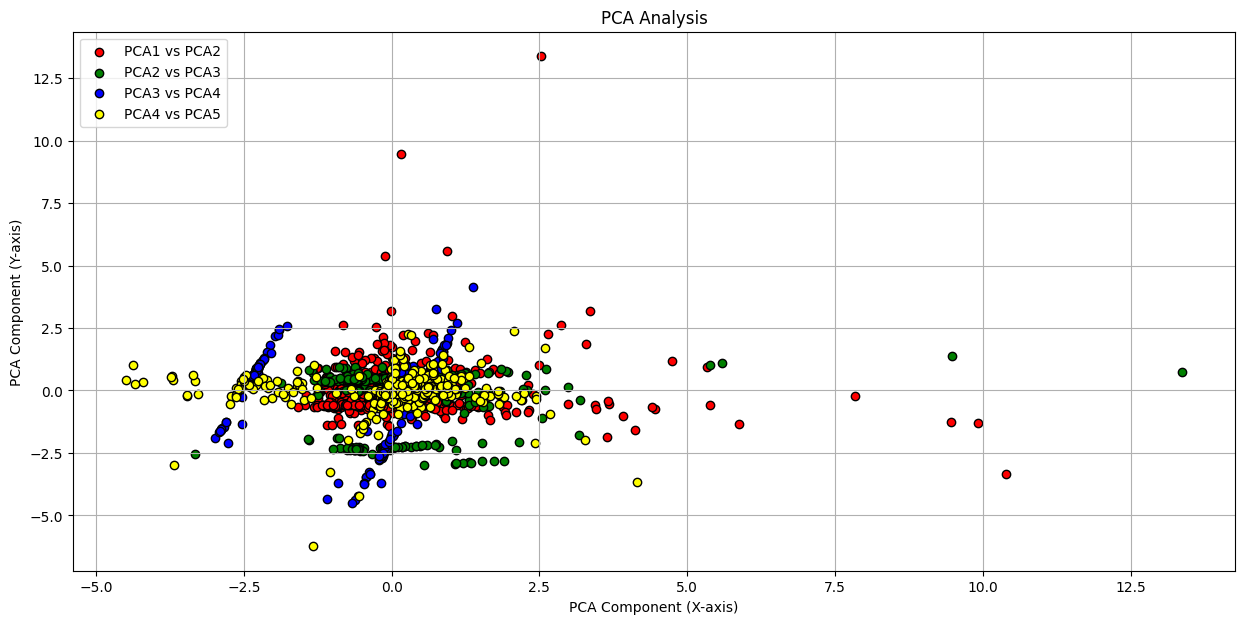

In [ ]:
print("Lets see the PCA Analysis for this Datsets.........\n")

plt.figure(figsize=(15,7))


plt.scatter(nndf['PCA1'], nndf['PCA2'],color="red", edgecolor='black', label='PCA1 vs PCA2')
plt.scatter(nndf['PCA2'], nndf['PCA3'],color="green", edgecolor='black', label='PCA2 vs PCA3')
plt.scatter(nndf['PCA3'], nndf['PCA4'],color="blue", edgecolor='black', label='PCA3 vs PCA4')
plt.scatter(nndf['PCA4'], nndf['PCA5'],color="yellow", edgecolor='black', label='PCA4 vs PCA5')
plt.title("PCA Analysis")
plt.xlabel("PCA Component (X-axis)")
plt.ylabel("PCA Component (Y-axis)")
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig("PCA_Analysys.png", dpi=500, bbox_inches='tight')
plt.show()


In [ ]:
print("")

l1 = ['PCA1','PCA2','PCA3','PCA4','PCA5']
values=np.round(variance*100,2)
plt.pie(values,labels=l1,autopct="%1.1f%%",startangle=90)
plt.title("PCA Analysys")
plt.show()